## Problem Statement :
#### Build a machine-learning model which can predict whether there will be rainfall today or not based on some atmospheric factors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('Rainfall.csv')

In [3]:
df=df1.copy() # creating checkpoint

In [4]:
df.head(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [5]:
df.rename(columns={'         winddirection':'wind_direction'},inplace=True)

In [6]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', 'wind_direction',
       'windspeed'],
      dtype='object')

In [7]:
new_col=['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'sunshine', 'wind_direction',
       'windspeed', 'rainfall']
df=df[new_col]

In [8]:
df.head(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,wind_direction,windspeed,rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,yes
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,yes
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,yes
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,yes


In [9]:
rain_count=df['rainfall'].value_counts()

In [10]:
df['rainfall']=df['rainfall'].map({'yes':1 , 'no':0})

In [11]:
df.head(5)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,wind_direction,windspeed,rainfall
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


In [12]:
df.isnull().sum()

day               0
pressure          0
maxtemp           0
temparature       0
mintemp           0
dewpoint          0
humidity          0
cloud             0
sunshine          0
wind_direction    1
windspeed         1
rainfall          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             366 non-null    int64  
 1   pressure        366 non-null    float64
 2   maxtemp         366 non-null    float64
 3   temparature     366 non-null    float64
 4   mintemp         366 non-null    float64
 5   dewpoint        366 non-null    float64
 6   humidity        366 non-null    int64  
 7   cloud           366 non-null    int64  
 8   sunshine        366 non-null    float64
 9   wind_direction  365 non-null    float64
 10  windspeed       365 non-null    float64
 11  rainfall        366 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [14]:
df.nunique()

day                31
pressure          188
maxtemp           174
temparature       158
mintemp           157
dewpoint          158
humidity           49
cloud              79
sunshine          104
wind_direction     31
windspeed         223
rainfall            2
dtype: int64

In [15]:
ws_mean=df['windspeed'].mean()
df['windspeed'].fillna(ws_mean,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15256\1746159970.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['windspeed'].fillna(ws_mean,inplace=True)


In [16]:
wd_med=df['wind_direction'].median()
df['wind_direction'].fillna(wd_med,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15256\3083869477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wind_direction'].fillna(wd_med,inplace=True)


In [17]:
df.isnull().sum()

day               0
pressure          0
maxtemp           0
temparature       0
mintemp           0
dewpoint          0
humidity          0
cloud             0
sunshine          0
wind_direction    0
windspeed         0
rainfall          0
dtype: int64

## Visualisation

([<matplotlib.patches.Wedge at 0x294c343a150>,
 [Text(-0.5903658817710604, 0.9281530723111778, 'yes'),
  Text(0.5903659686710199, -0.9281530170371309, 'no')],
 [Text(-0.32201775369330565, 0.5062653121697333, '68.03%'),
  Text(0.32201780109328354, -0.5062652820202531, '31.97%')])

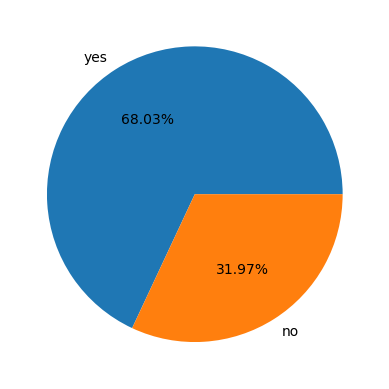

In [18]:
plt.pie(rain_count,labels=rain_count.index,autopct='%1.2f%%')

## Observation
    Dataset is not balanced so we need to balance it.

<Axes: >

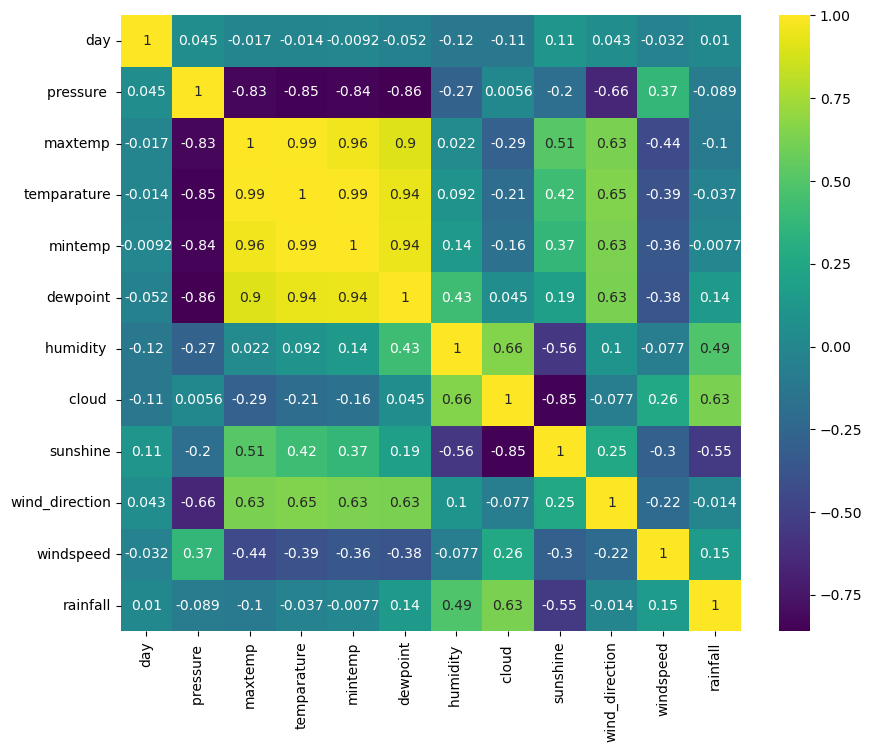

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

## Observation :
    - Very High positive correlation between temperature, maxtemp, mintemp and dewpoint.
    - So we need to drop or combine them , I prefer to drop maxtemp and mintemp.
    - Not droping temperature and dewpoint because they are more generalize term and variable term.

In [20]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

<Axes: >

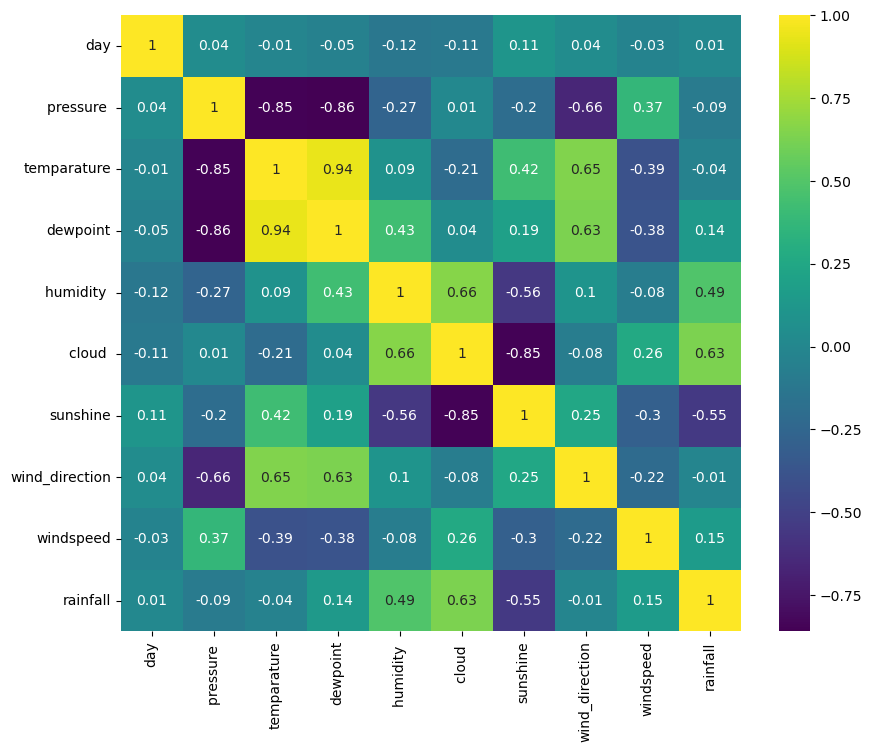

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2),cmap='viridis',annot=True)

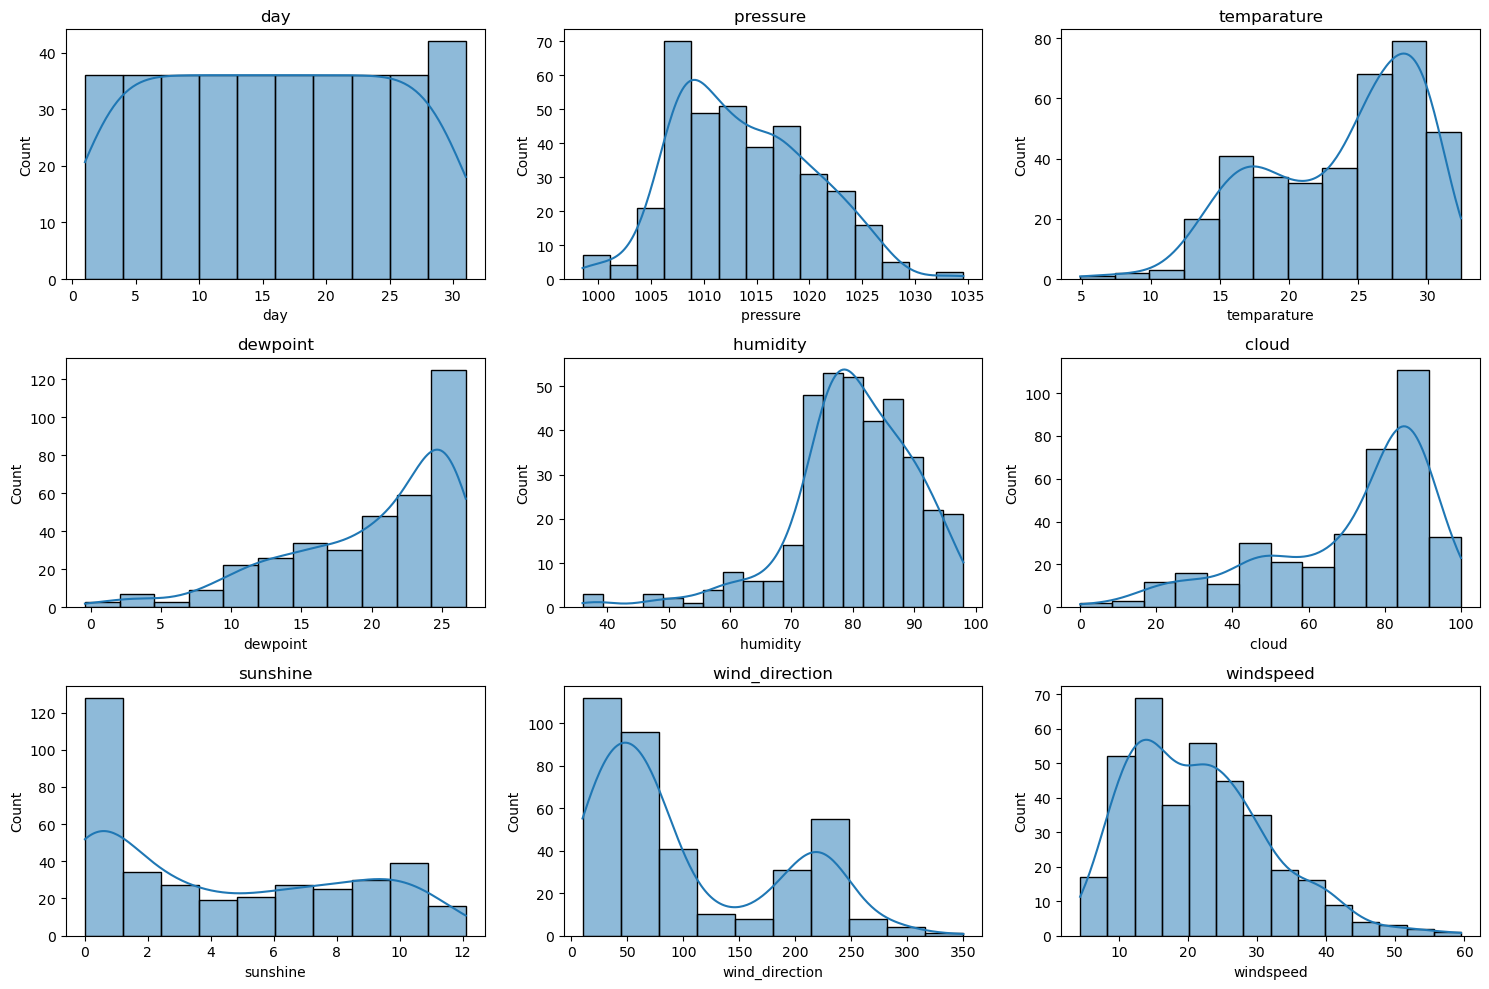

In [22]:
count=1
plt.figure(figsize=(15, 10))
for j in [i for i in df.columns if i!='rainfall']:
    plt.subplot(3,3,count)
    sns.histplot(df[j],kde=True)
    plt.title(j)
    count+=1
plt.tight_layout() 
plt.show() # We have not used it inside loop because we want to refer whole figure     

In [23]:
df_1=df.copy()

##  Using two approach fo handling imbalance in data : 
     Using SMOTE - i.e doing oversampling.
     Using weights.

### Using SMOTE

In [24]:
x=df_1.drop('rainfall',axis=1)
y=df_1['rainfall']

In [25]:
x_s=x
y_s=y

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.2, random_state=42)

In [27]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_s,y_train_s=sm.fit_resample(x_train,y_train)

In [28]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_train_s=SS.fit_transform(x_train_s)
x_test_s=SS.transform(x_test)

In [29]:
import pickle
pickle.dump(SS,open('scalar.pkl','wb'))

In [30]:
y_train_s.value_counts()


rainfall
0    198
1    198
Name: count, dtype: int64

### Model Selection

1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_s=LogisticRegression()
param_grid = {
    'penalty': ['l1','l2','elasticnet', 'none'],  
    'C': [0.5,1,2,10],            
    'solver': ['saga'],                             
    'l1_ratio': [0,0.5, 1], 
}
log_s=GridSearchCV(estimator=log_s,param_grid=param_grid,cv=3,scoring='accuracy')
log_s.fit(x_train_s,y_train_s)
y_pred_log_s=log_s.predict(x_test_s)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\skl

<Figure size 900x900 with 0 Axes>

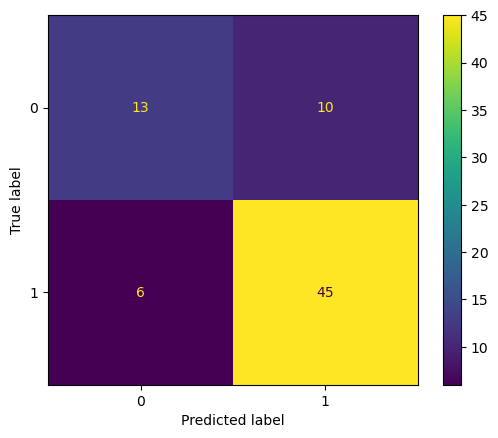

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay
accuracy=accuracy_score(y_test,y_pred_log_s)
precision=precision_score(y_test,y_pred_log_s)
recall=recall_score(y_test,y_pred_log_s)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log_s,cmap='viridis')
plt.show()


In [33]:
log_s.best_params_

{'C': 0.5, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}

In [34]:
table=pd.DataFrame([['Logistic Regression',precision,recall,accuracy]],columns=['Model', 'Precision','Recall' ,'Accuracy'])
table

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.818182,0.882353,0.783784


### SGD

In [35]:
from sklearn.linear_model import SGDClassifier
sgd_s=SGDClassifier()
sgd_s.fit(x_train_s,y_train_s)
y_pred_sgd_s=sgd_s.predict(x_test_s)

<Figure size 900x900 with 0 Axes>

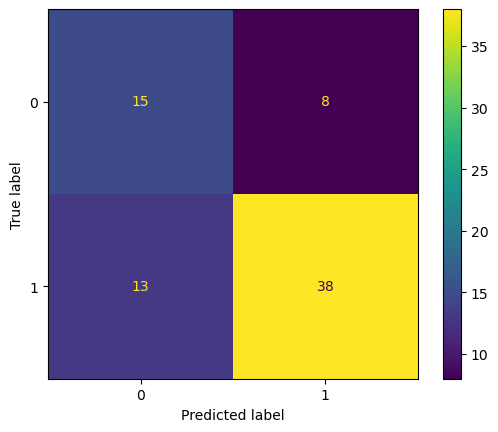

In [36]:
accuracy2=accuracy_score(y_test,y_pred_sgd_s)
precision2=precision_score(y_test,y_pred_sgd_s)
recall2=recall_score(y_test,y_pred_sgd_s)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sgd_s,cmap='viridis')
plt.show()


In [37]:
table2=pd.DataFrame([['SGD',precision2,recall2,accuracy2]],columns=['Model', 'Precision','Recall' ,'Accuracy'])
table=pd.concat([table,table2],ignore_index=True)
table

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.818182,0.882353,0.783784
1,SGD,0.826087,0.745098,0.716216


### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_s=KNeighborsClassifier()
knn_s.fit(x_train_s,y_train_s)
y_pred_knn_s=knn_s.predict(x_test_s)

<Figure size 900x900 with 0 Axes>

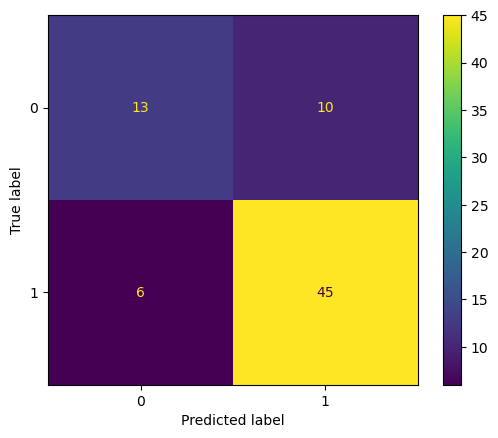

In [39]:
accuracy3=accuracy_score(y_test,y_pred_knn_s)
precision3=precision_score(y_test,y_pred_knn_s)
recall3=recall_score(y_test,y_pred_knn_s)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn_s,cmap='viridis')
plt.show()


In [40]:
table3=pd.DataFrame([['KNN',precision3,recall3,accuracy3]],columns=['Model', 'Precision','Recall' ,'Accuracy'])
table=pd.concat([table,table3],ignore_index=True)
table

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.818182,0.882353,0.783784
1,SGD,0.826087,0.745098,0.716216
2,KNN,0.818182,0.882353,0.783784


### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
DT_s=DecisionTreeClassifier()
DT_s.fit(x_train_s,y_train_s)
y_pred_dt_s=DT_s.predict(x_test_s)

<Figure size 900x900 with 0 Axes>

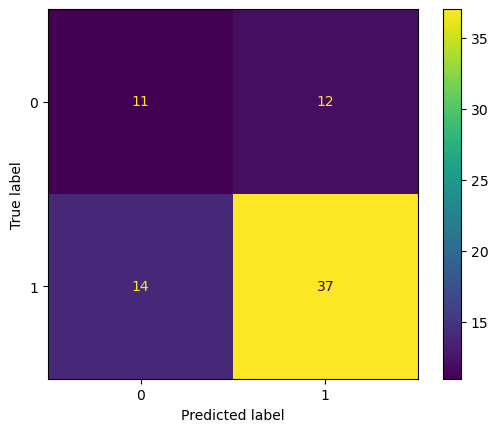

In [42]:
accuracy4=accuracy_score(y_test,y_pred_dt_s)
precision4=precision_score(y_test,y_pred_dt_s)
recall4=recall_score(y_test,y_pred_dt_s)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt_s,cmap='viridis')
plt.show()

In [43]:
table4=pd.DataFrame([['Decision Tree',precision4,recall4,accuracy4]],columns=['Model', 'Precision','Recall' ,'Accuracy'])
table=pd.concat([table,table4],ignore_index=True)
table

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.818182,0.882353,0.783784
1,SGD,0.826087,0.745098,0.716216
2,KNN,0.818182,0.882353,0.783784
3,Decision Tree,0.755102,0.725490,0.648649


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
# Initialize RandomForestClassifier
RF_s = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=RF_s, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train_s, y_train_s)

# Best parameters and model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict using the best model
y_pred_rf_s = best_rf.predict(x_test_s)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [45]:
best_params

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5}

<Figure size 900x900 with 0 Axes>

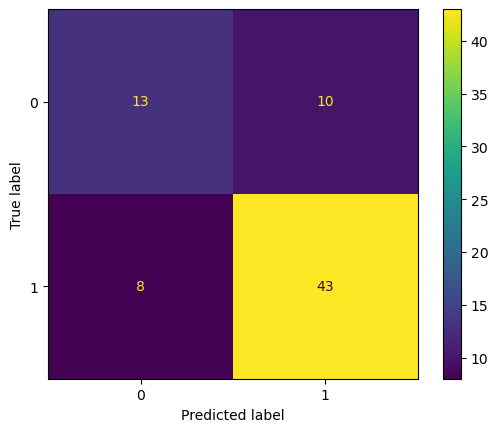

In [46]:
accuracy5=accuracy_score(y_test,y_pred_rf_s)
precision5=precision_score(y_test,y_pred_rf_s)
recall5=recall_score(y_test,y_pred_rf_s)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf_s,cmap='viridis')
plt.show()

In [47]:
table5=pd.DataFrame([['Random Forest',precision5,recall5,accuracy5]],columns=['Model', 'Precision','Recall' ,'Accuracy'])
table=pd.concat([table,table5],ignore_index=True)
table

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.818182,0.882353,0.783784
1,SGD,0.826087,0.745098,0.716216
2,KNN,0.818182,0.882353,0.783784
3,Decision Tree,0.755102,0.725490,0.648649
4,Random Forest,0.811321,0.843137,0.756757


### Using Weights

In [48]:
SS_w=StandardScaler()
x_train_w=SS_w.fit_transform(x_train)
x_test_w=SS_w.transform(x_test)

In [49]:
rf_w=RandomForestClassifier(class_weight='balanced')
rf_w.fit(x_train_w,y_train)
y_pred_rf_w=rf_w.predict(x_test_w)

<Figure size 900x900 with 0 Axes>

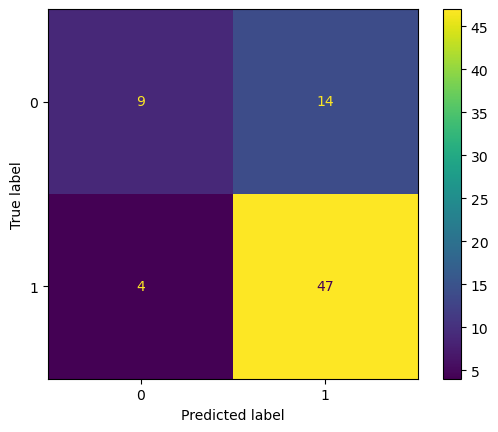

In [50]:
accuracy6=accuracy_score(y_test,y_pred_rf_w)
precision6=precision_score(y_test,y_pred_rf_w)
recall6=recall_score(y_test,y_pred_rf_w)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf_w,cmap='viridis')
plt.show()

In [51]:
table6=pd.DataFrame([['Random Forest Weighted',precision6,recall6,accuracy6]],columns=['Model', 'Precision','Recall' ,'Accuracy'])
table=pd.concat([table,table6],ignore_index=True)
table

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.818182,0.882353,0.783784
1,SGD,0.826087,0.745098,0.716216
2,KNN,0.818182,0.882353,0.783784
3,Decision Tree,0.755102,0.725490,0.648649
4,Random Forest,0.811321,0.843137,0.756757
5,Random Forest Weighted,0.770492,0.921569,0.756757


In [52]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_s, y_train_s)
y_pred_svc_s=svc.predict(x_test_s)

<Figure size 900x900 with 0 Axes>

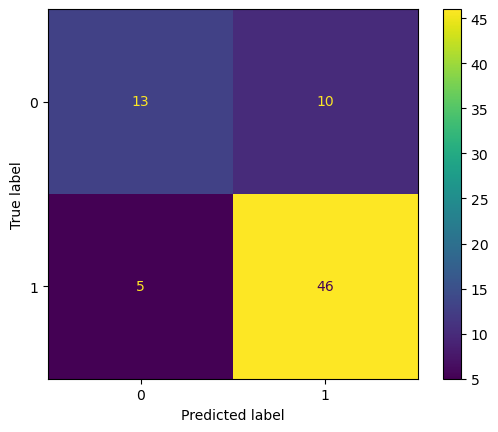

In [53]:
accuracy7=accuracy_score(y_test,y_pred_svc_s)
precision7=precision_score(y_test,y_pred_svc_s)
recall7=recall_score(y_test,y_pred_svc_s)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_s,cmap='viridis')
plt.show()

In [54]:
table7=pd.DataFrame([['SVC',precision7,recall7,accuracy7]],columns=['Model','Precision','Recall','Accuracy'])
table=pd.concat([table,table7],ignore_index=True)

In [55]:
table

,Model,Precision,Recall,Accuracy
0,Logistic Regression,0.818182,0.882353,0.783784
1,SGD,0.826087,0.745098,0.716216
2,KNN,0.818182,0.882353,0.783784
3,Decision Tree,0.755102,0.725490,0.648649
4,Random Forest,0.811321,0.843137,0.756757
5,Random Forest Weighted,0.770492,0.921569,0.756757
6,SVC,0.821429,0.901961,0.797297


In [56]:
table=table.round(2)

In [57]:
table=table.sort_values(by='Accuracy',ascending=False)

In [58]:
table

,Model,Precision,Recall,Accuracy
6,SVC,0.82,0.90,0.80
0,Logistic Regression,0.82,0.88,0.78
2,KNN,0.82,0.88,0.78
4,Random Forest,0.81,0.84,0.76
5,Random Forest Weighted,0.77,0.92,0.76
1,SGD,0.83,0.75,0.72
3,Decision Tree,0.76,0.73,0.65


## Since SVC is best model so I am going to fine-tune it.

In [59]:
svc1 = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1,1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(x_train_s, y_train_s)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

svc_best=grid_search.best_estimator_
y_pred_svc_best=svc_best.predict(x_test_s)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.8486392405063292


<Figure size 900x900 with 0 Axes>

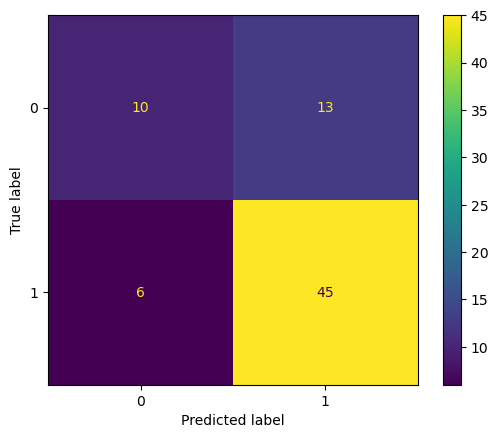

In [60]:
accuracy8=accuracy_score(y_test,y_pred_svc_best)
precision8=precision_score(y_test,y_pred_svc_best)
recall8=recall_score(y_test,y_pred_svc_best)
plt.figure(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc_best,cmap='viridis')
plt.show()

In [61]:
accuracy8

0.7432432432432432

### `Still our old SVC model is best so I am going pickel that only.`

`Pickling Model file for Deployment`

In [62]:
import pickle
pickle.dump(svc,open('rainsvcmodel.pkl','wb'))

_For loading pickle file we can use :_ `pickle_model=pickle.load(open('rainsvcmodel.pkl','rb'))`

In [63]:
pickle_model=pickle.load(open('rainsvcmodel.pkl','rb'))

In [64]:
pickle_model.predict([x_test_s[0]])


array([1], dtype=int64)